In [8]:
import json, os
i = 4
directory = os.getcwd()
monpremierex = json.load(open(f"{directory}/input/tcl{i}/tcl{i}.json", "r"))
monpremierex_output = json.load(open(f"{directory}/output/tcl{i}/tcl{i}.json", "r"))

In [9]:
print(monpremierex)

{'name': 'tcl3', 'input_path': 'tcl/input/tcl3', 'output_path': 'tcl/output/tcl3', 'working_dir': 'tcl/input/tcl3', 'initial_temperature': 17.22658742472377, 'coefDeltaTemp': 0.05625, 'coefConso': 1, 'puissanceMin': 0, 'puissanceMax': 4, 'temperature_max': 20.652842435596675, 'temperature_min': 15.406761617831176, 'chroniqueTempExt': [-0.4679998123482967, -1.5819099222791961, 1.106315955312117, 1.7566031448622108, 0.8729483690180615, 0.17886536574468437, 3.12658190690444, -0.6081525305763582, 1.2161511645638796, 0.940178176867586, 2.0105607153913647, 1.607440182994696, 3.0601849242523045, 2.1710337142048854, 1.342532802045135, 2.4389017049493806, 2.966296528869173, 4.478931040848771, 1.9787262254200808, 4.014705025715078, 5.324642060325836, 4.5400941615472385, 6.176646187977019, 4.687662798516973, 6.117441476311048, 5.728704482405566, 7.181714323713617, 7.44041197769554, 6.677705693387254, 4.832633064142604, 6.868316324842496, 5.01719029817966, 6.801588169390002, 6.7231874029309, 5.826

In [10]:
temperature_max = monpremierex["temperature_max"]
temperature_min = monpremierex["temperature_min"]
coefDeltaTemp = monpremierex["coefDeltaTemp"]
electricity_cost = monpremierex["electricity_cost"]
coefConso = monpremierex["coefConso"]
initial_temperature = monpremierex["initial_temperature"]
chroniqueTempExt = monpremierex["chroniqueTempExt"]
puissanceMin = monpremierex["puissanceMin"]
puissanceMax = monpremierex["puissanceMax"]
load = monpremierex_output["load"]


In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
T = 48
temp_profile = np.zeros(T)
temp_profile[0] = initial_temperature
temp_min_liste =  [temperature_min for k in range(T)]
temp_max_liste =  [temperature_max for k in range(T)]
for t in range(1,T):
    temp_profile[t] = temp_profile[t - 1] + load[t] * coefConso*0.5 + 0.5*coefDeltaTemp*(chroniqueTempExt[t-1]-temp_profile[t-1])

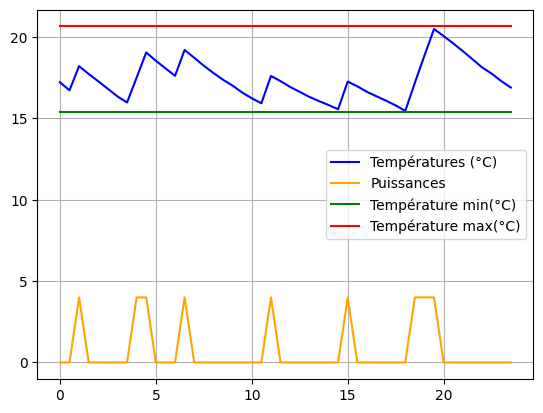

In [13]:
temps = [k/2 for k in range(48)]
plt.plot(temps, temp_profile, label='Températures (°C)', color='blue', marker='')
plt.plot(temps, load, label='Puissances', color='orange', marker='')
plt.plot(temps, temp_min_liste, label='Température min(°C)', color='green', marker='')
plt.plot(temps, temp_max_liste, label='Température max(°C)', color='red', marker='')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
facture_totale=0
for i in range(4):
    tcl_i = json.load(open(f"{directory}/output/tcl{i+1}/tcl{i+1}.json", "r"))
    facture_totale+=tcl_i["cost"]
print(facture_totale)

-728.112110533912
